#### Auto Regressive Integrated Moving Average.

In [1]:
#import modules 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from pandas import DataFrame
register_matplotlib_converters()

In [2]:
#read in the data set
df = pd.read_csv('F.csv')
df.head()

,Unnamed: 0,T,A,E,x,U,Y,C,H,M,...,P,D,J,MM,NN,SS,SR,SW,TW,TH
0,0,1/3/2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,1/4/2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,1/5/2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,1/6/2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,1/7/2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
#Lets clean the data set a bit. This code removes all the columns we do not need. In this case we only need: Australia, UK,Japanese
# and Euro. So we drop all the other columns.
drop_columns=["x","Y","C","H","M","I","P","D","S","MM","NN","SS","SR","SW","TW","TH","M.1","K"]
df.drop(drop_columns, inplace=True, axis=1)
df.head()

,Unnamed: 0,T,A,E,U,J
0,0,1/3/2000,1.5172,0.9847,0.6146,101.7
1,1,1/4/2000,1.5239,0.97,0.6109,103.09
2,2,1/5/2000,1.5267,0.9676,0.6092,103.77
3,3,1/6/2000,1.5291,0.9686,0.607,105.19
4,4,1/7/2000,1.5272,0.9714,0.6104,105.17


In [4]:
#Force converting all the columns to numerical numbers. Afterwards converting the NaN's to zero's
df["A"]=pd.to_numeric(df["A"], errors='coerce')
df["E"]=pd.to_numeric(df["E"], errors='coerce')
df["U"]=pd.to_numeric(df["U"], errors='coerce')
df["J"]=pd.to_numeric(df["J"], errors='coerce')
df["A"] = df["A"].fillna(0)
df["E"] = df["E"].fillna(0)
df["U"] = df["U"].fillna(0)
df["J"] = df["J"].fillna(0)

#### ADF check for stationarity. This has to be done before any prediction. If the data is not stationary we have to difference it to make it stationary

In [5]:
#checking for stationarity using the dicky fuller test.
#For the Australian Series
result = adfuller(df['A'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
#For the Euro Series:

result1 = adfuller(df['E'])
print('ADF Statistic: {}'.format(result1[0]))
print('p-value: {}'.format(result1[1]))
print('Critical Values:')
for key, value in result1[4].items():
    print('\t{}: {}'.format(key, value))
    
#For the Japanese series:
result2 = adfuller(df['J'])
print('ADF Statistic: {}'.format(result2[0]))
print('p-value: {}'.format(result2[1]))
print('Critical Values:')
for key, value in result2[4].items():
    print('\t{}: {}'.format(key, value))

#For the UK pound series
result3 = adfuller(df['U'])
print('ADF Statistic: {}'.format(result3[0]))
print('p-value: {}'.format(result3[1]))
print('Critical Values:')
for key, value in result3[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.8942580607743895
p-value: 0.33476710293709644
Critical Values:
	1%: -3.431612064235319
	5%: -2.8620977002765726
	10%: -2.567066863784639
ADF Statistic: -2.449336136805102
p-value: 0.12829284826854465
Critical Values:
	1%: -3.431612064235319
	5%: -2.8620977002765726
	10%: -2.567066863784639
ADF Statistic: -2.61048345375351
p-value: 0.09084985058345146
Critical Values:
	1%: -3.431612064235319
	5%: -2.8620977002765726
	10%: -2.567066863784639
ADF Statistic: -2.389382404676024
p-value: 0.14475559870060073
Critical Values:
	1%: -3.431612064235319
	5%: -2.8620977002765726
	10%: -2.567066863784639


##### Clearly none of them are stationary from above. abs(dickerfuller stat)> p.values

In [6]:
#Let's take a look at what our data set looks like.
df.describe()

,Unnamed: 0,A,E,U,J
count,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000
mean,2608.000000,1.281462,0.811876,0.616068,102.544723
std,1506.162508,0.367267,0.203679,0.146769,24.141168
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1304.000000,1.094700,0.743700,0.569200,97.860000
50%,2608.000000,1.305300,0.811200,0.633500,108.620000
75%,3912.000000,1.424300,0.897300,0.690200,116.440000
max,5216.000000,2.071300,1.209200,0.828700,134.770000


In [7]:
#This table only has the columns we need and the date column.
df.to_csv(r'C:\Users\Rodgers\Desktop\PhD courses\PhD courses\EconS 513 Jia Yan\C.csv', index = False)

In [8]:
#Here we read in the data set with only the columns we need for this exercise
df1=pd.read_csv("C.csv",parse_dates=["T"], index_col=["T"])
df1.head()

,A,E,U,J
T,,,,
2000-01-03,1.5172,0.9847,0.6146,101.70
2000-01-04,1.5239,0.9700,0.6109,103.09
2000-01-05,1.5267,0.9676,0.6092,103.77
2000-01-06,1.5291,0.9686,0.6070,105.19
2000-01-07,1.5272,0.9714,0.6104,105.17


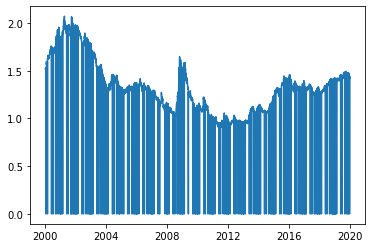

In [9]:
#As an example we plot the time series for Austalia to have a look at it
plt.plot(df1["A"])
plt.show()

C:\Users\Rodgers\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


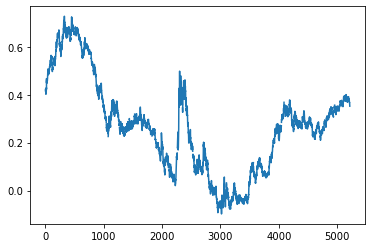

In [10]:
df_log = np.log(df["A"])
plt.plot(df_log)

In [11]:
#plt.xlabel('Date')
#plt.ylabel('')
#plt.plot(df["J"])

In [12]:
#let's difference the data to get a stationary
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(df1['A'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

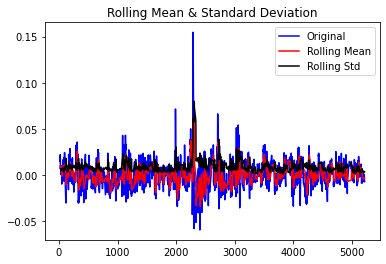

ADF Statistic: -1.8942580607743895
p-value: 0.33476710293709644
Critical Values:
	1%: -3.431612064235319
	5%: -2.8620977002765726
	10%: -2.567066863784639


In [13]:
#here we are plotting the graph for just one series.Australia.
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.A   No. Observations:                 5216
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -806.234
Method:                       css-mle   S.D. of innovations              0.282
Date:                Mon, 21 Dec 2020   AIC                           1626.469
Time:                        11:09:09   BIC                           1672.385
Sample:                    01-04-2000   HQIC                          1642.527
                         - 12-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.77e-05      0.001     -0.045      0.964      -0.002       0.002
ar.L1.D.A     -0.8544      0.014    -62.427      0.000      -0.881      -0.828
ar.L2.D.A     -0.7002      0.017    -40.608      0.0

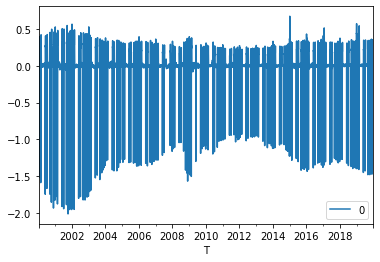

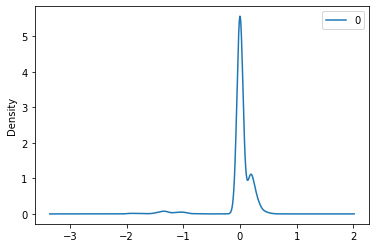

                 0
count  5216.000000
mean      0.000003
std       0.282414
min      -2.013601
25%      -0.007898
50%       0.003975
75%       0.027874
max       0.671936


In [14]:
#Arima model for "AUSTRALIA" timeseries.
model = ARIMA(df1["A"], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.E   No. Observations:                 5216
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1623.558
Method:                       css-mle   S.D. of innovations              0.177
Date:                Mon, 21 Dec 2020   AIC                          -3233.117
Time:                        11:09:12   BIC                          -3187.201
Sample:                    01-04-2000   HQIC                         -3217.058
                         - 12-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.38e-05      0.001     -0.050      0.960      -0.001       0.001
ar.L1.D.E     -0.8545      0.014    -62.420      0.000      -0.881      -0.828
ar.L2.D.E     -0.7006      0.017    -40.592      0.0

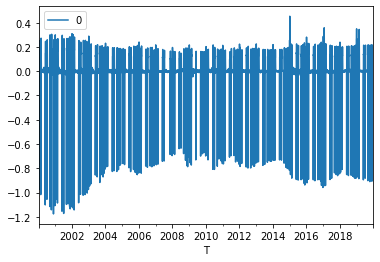

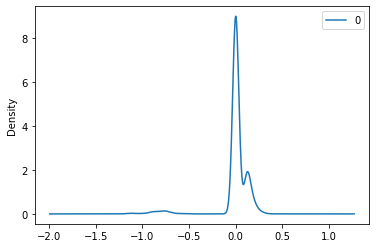

                 0
count  5216.000000
mean     -0.000004
std       0.177246
min      -1.176245
25%      -0.004271
50%       0.002318
75%       0.014064
max       0.453341


In [15]:
#Arima model for "EURO" timeseries.
model = ARIMA(df1["E"], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.J   No. Observations:                 5216
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -23580.218
Method:                       css-mle   S.D. of innovations             22.236
Date:                Mon, 21 Dec 2020   AIC                          47174.435
Time:                        11:09:21   BIC                          47220.352
Sample:                    01-04-2000   HQIC                         47190.494
                         - 12-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.085     -0.014      0.989      -0.167       0.165
ar.L1.D.J     -0.8522      0.014    -62.204      0.000      -0.879      -0.825
ar.L2.D.J     -0.6977      0.017    -40.431      0.0

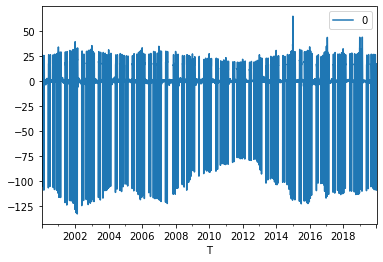

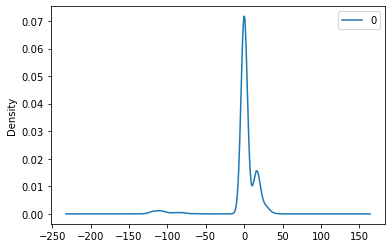

                 0
count  5216.000000
mean      0.000814
std      22.237872
min    -133.260928
25%      -0.504950
50%       0.340155
75%       1.688381
max      64.925112


In [16]:
#Arima model for "JAPANESE" timeseries.
model = ARIMA(df1["J"], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Rodgers\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.U   No. Observations:                 5216
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3029.881
Method:                       css-mle   S.D. of innovations              0.135
Date:                Mon, 21 Dec 2020   AIC                          -6045.761
Time:                        11:09:24   BIC                          -5999.845
Sample:                    01-04-2000   HQIC                         -6029.702
                         - 12-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.305e-05      0.001      0.025      0.980      -0.001       0.001
ar.L1.D.U     -0.8541      0.014    -62.368      0.000      -0.881      -0.827
ar.L2.D.U     -0.7003      0.017    -40.578      0.0

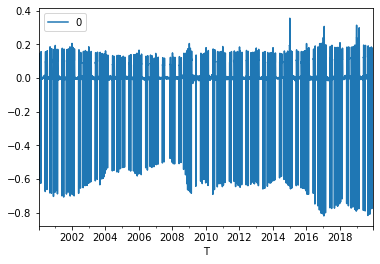

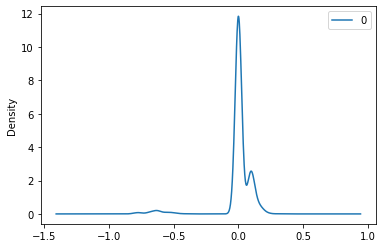

                 0
count  5216.000000
mean     -0.000002
std       0.135358
min      -0.820225
25%      -0.003164
50%       0.001493
75%       0.009942
max       0.355430


In [17]:
#Arima model for "UK" timeseries.
model = ARIMA(df1["U"], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())